In [1]:
import pandas as pd

In [2]:
# Import data
data_url = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q3.xlsx'
df = pd.read_excel(data_url)

In [4]:
# Add extra data
df['DECISION_TIME'] = df['DECISION_DATE'] - df['RECEIVED_DATE']

In [10]:
# Filter the audit case, assuming that the audit case is the case that has a decision time of more than 365 days
days_audit = 320
df_audit = df[df['DECISION_TIME'] > pd.Timedelta(days=days_audit)]
df_audit = df_audit[df_audit['DECISION_TIME'] < pd.Timedelta(days=600)]
df_audit = df_audit[df_audit['CASE_STATUS'] != 'Certified-Expired']
df_audit

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,DECISION_TIME
636,A-21260-45963,Denied,2021-11-01,2022-10-03,N,NaT,NaN,N,The Florida Company LLC,14804 NE 31st St.,...,NaN,N,N,N,Lourdes S TANCINCO,Attorney at Law,lou@tancinco.com,Jason V CORRE,AdministratorOwner,336 days
692,A-21025-45354,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
693,A-21025-45403,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
1343,A-21288-59078,Denied,2021-11-02,2022-10-04,N,NaT,NaN,N,Cleanstar National Inc,540 Collins Road,...,NaN,N,N,N,ROBERT LUBIN,ATTORNEY,aiilaw@aiilaw.com,JACOB AMEDEE,CEO,336 days
1480,A-21106-75277,Denied,2021-05-04,2022-10-05,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,Y,N,Faraz Qaisrani,Associate Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global Mobility Immigration,519 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86165,A-21330-78159,Denied,2021-11-26,2023-06-30,N,NaT,NaN,N,RUNNERS DIVERSIFIED INCORPORATED,3428 GA HIGHWAY 297,...,NaN,N,N,Y,,NaN,NaN,Moore Kelly,Human Resources Manager,581 days
86189,A-22144-60310,Denied,2022-05-24,2023-06-30,N,NaT,NaN,N,"Felher Transportation, Inc.",14703 Cassidy Dr.,...,N,N,N,N,Xavier A Mendez,Attorney,xamendez@xamlaw.com,Isaac Herrera,VicePresident,402 days
86190,A-22144-60432,Denied,2022-05-24,2023-06-30,N,NaT,NaN,N,"Felher Transportation, Inc.",14703 Cassidy Dr.,...,N,N,N,N,Xavier A Mendez,Attorney,xamendez@xamlaw.com,Isaac Herrera,VicePresident,402 days
86191,A-22144-60441,Denied,2022-05-24,2023-06-30,N,NaT,NaN,N,"Felher Transportation, Inc.",14703 Cassidy Dr.,...,N,N,N,N,Xavier A Mendez,Attorney,xamendez@xamlaw.com,Isaac Herrera,VicePresident,402 days


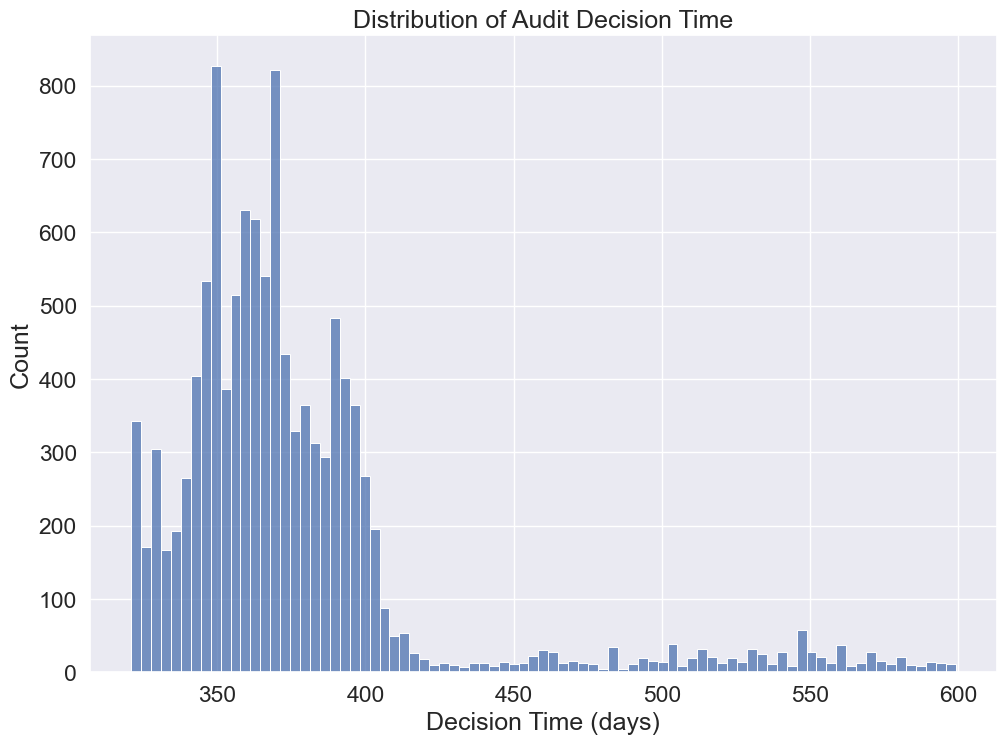

In [11]:
# Visualise the histogram distribution audt decision time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.histplot(x=df_audit['DECISION_TIME'].dt.days)
ax.set(xlabel='Decision Time (days)', title='Distribution of Audit Decision Time')
plt.show()